In [56]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:

BASE = "../data/elliptic_bitcoin_dataset"

features = pd.read_csv(f"{BASE}/elliptic_txs_features.csv", header=None)
edges = pd.read_csv(f"{BASE}/elliptic_txs_edgelist.csv")
labels = pd.read_csv(f"{BASE}/elliptic_txs_classes.csv")

print(features.shape, edges.shape, labels.shape)


(203769, 167) (234355, 2) (203769, 2)


In [58]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [59]:
labels.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [60]:
labels['class'].value_counts()

class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64

In [61]:
label_map = {"1": "illicit", "2": "licit"}
labels["class_name"] = labels["class"].map(label_map)
labels["class_name"].value_counts(dropna=False)


class_name
NaN        157205
licit       42019
illicit      4545
Name: count, dtype: int64

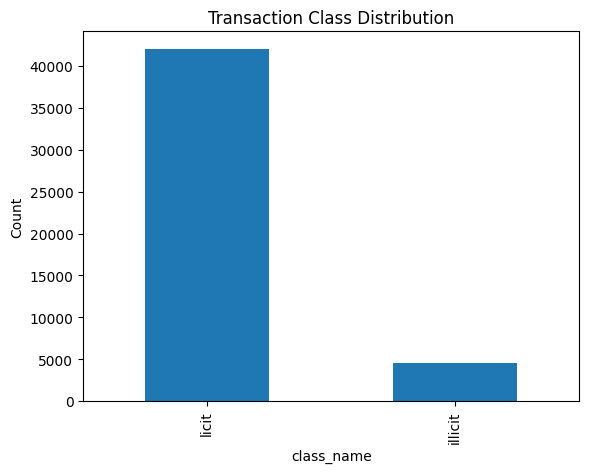

In [62]:
labels["class_name"].value_counts().plot(kind="bar")
plt.title("Transaction Class Distribution")
plt.ylabel("Count")
plt.show()


In [63]:
features.columns = [f"f_{i}" for i in range(features.shape[1])]
features.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_157', 'f_158', 'f_159', 'f_160', 'f_161', 'f_162', 'f_163', 'f_164',
       'f_165', 'f_166'],
      dtype='str', length=167)

In [64]:
df = features.merge(
    labels[["txId", "class_name"]],
    left_index=True,
    right_on="txId",
    how="left"
)
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,txId,class_name
NaN,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0,NaN
NaN,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1,NaN
NaN,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,2,NaN
NaN,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,3,NaN
NaN,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,4,NaN


In [65]:
df["f_0"].describe()
df["f_0"].value_counts().sort_index().head()


f_0
1076    1
2534    1
3181    1
3321    1
3889    1
Name: count, dtype: int64

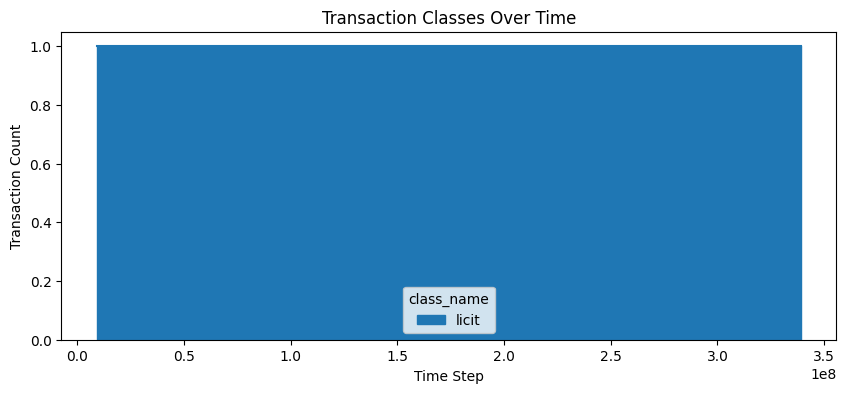

In [68]:
df_plot = df.reset_index(drop=True)

ct = pd.crosstab(df_plot["f_0"], df_plot["class_name"])

ct = ct.sort_index()

ct.plot(kind="area", stacked=True, figsize=(10,4))
plt.title("Transaction Classes Over Time")
plt.xlabel("Time Step")
plt.ylabel("Transaction Count")
plt.show()


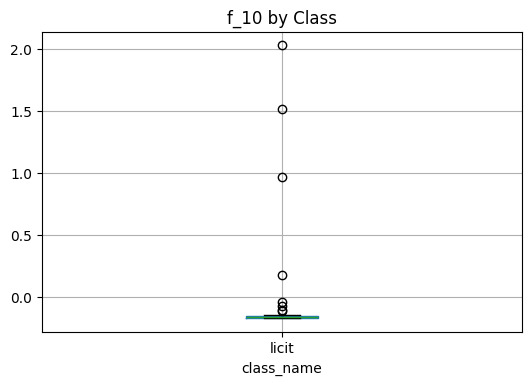

In [69]:
feature = "f_10"  # example, you’ll confirm meaning later

df.boxplot(column=feature, by="class_name", figsize=(6,4))
plt.title(f"{feature} by Class")
plt.suptitle("")
plt.show()


In [70]:
edges.head()
edges.shape


(234355, 2)

In [71]:
edges['txId1'].value_counts().describe()


count    166345.000000
mean          1.408849
std           2.008279
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         472.000000
Name: count, dtype: float64